# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
Banner id: 904358311
verification code: b70250d95dcd
```

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2960 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1000,2025-11-16 06:30:00,Suburb,108,1.0,2.94,Credit,True
1,1001,2025-11-16 06:35:00,Suburb,101,2.0,6.52,Credit,True
2,1008,2025-11-16 07:03:00,Suburb,104,1.0,2.26,Credit,True
3,1009,2025-11-16 07:17:00,Campus,108,1.0,2.47,Mobile,False
4,1007,2025-11-16 07:20:00,Campus,108,1.0,2.41,Mobile,False


In [2]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [ ]:
# Task 1: use isna(), nunique(), min/max on timestamp

In [9]:
# 1. Missing values are in each column 
missing_sales = sales.isna().sum()
missing_products = products.isna().sum()

print("Missing values in Sales Dataset:")
print(missing_sales)
print("\nMissing values in Products Dataset:")
print(missing_products)

Missing values in Sales Dataset:
transaction_id    0
timestamp         0
location          0
product_id        0
quantity          6
revenue           4
payment_method    0
loyalty_member    0
dtype: int64

Missing values in Products Dataset:
product_id    0
name          0
category      0
cost          0
dtype: int64


In [10]:
# 2. Unique product IDs 
unique_sales_products = sales['product_id'].nunique()
catalog_catalog_products = products['product_id'].nunique()
catalog_size = len(sales)

print("\nUnique product IDs in sales data:", unique_sales_products)
print("Unique product IDs in products catalog:", catalog_catalog_products)
print("Product catalog size:", catalog_size)


Unique product IDs in sales data: 21
Unique product IDs in products catalog: 18
Product catalog size: 2960


In [11]:
# 3. Date range 
earliest_date = sales['timestamp'].min()
latest_date = sales['timestamp'].max()

print("\nDate range of transactions:")
print("Earliest:", earliest_date)
print("Latest:  ", latest_date)


Date range of transactions:
Earliest: 2025-11-16 06:30:00
Latest:   2025-11-29 21:41:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [12]:
# Task 2: use pd.merge() with appropriate join type

merged = pd.merge(sales, products, on='product_id', how='left')
merged.head()

,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
0,1000,2025-11-16 06:30:00,Suburb,108,1.0,2.94,Credit,True,Chai Latte,Tea,1.2
1,1001,2025-11-16 06:35:00,Suburb,101,2.0,6.52,Credit,True,Espresso,Coffee,1.2
2,1008,2025-11-16 07:03:00,Suburb,104,1.0,2.26,Credit,True,Americano,Coffee,1.0
3,1009,2025-11-16 07:17:00,Campus,108,1.0,2.47,Mobile,False,Chai Latte,Tea,1.2
4,1007,2025-11-16 07:20:00,Campus,108,1.0,2.41,Mobile,False,Chai Latte,Tea,1.2


## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [ ]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs

In [13]:
# 1. Compare shapes
print("Sales shape:", sales.shape)
print("Merged shape:", merged.shape)

Sales shape: (2960, 8)
Merged shape: (2960, 11)


In [14]:
# 2. Check missing values in product columns
missing_column = merged[['name', 'category', 'cost']].isna().sum()
print("\nMissing values in product columns:")
print(missing_column)


Missing values in product columns:
name        9
category    9
cost        9
dtype: int64


In [15]:
# 3. If there ARE missing values, find the product_ids causing them
missing_products = merged[merged['name'].isnull() | 
                          merged['category'].isnull() | 
                          merged['cost'].isnull()]

print("\nNumber of rows with missing product info:", len(missing_products))

if len(missing_products) > 0:
    print("\nProblematic product_id values:")
    print(missing_products['product_id'].unique())


Number of rows with missing product info: 9

Problematic product_id values:
[200 199 201]


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [20]:
# Task 4: create profit column, then groupby with .agg()

# Removing transactions with missing product info
merged_clean = merged.dropna(subset=['name','category','cost']).copy()

# Calculate profit per transaction
merged_clean['profit'] = merged_clean['revenue'] - (merged_clean['cost'] * merged_clean['quantity'])

# Summarize profitability by product category
category_profit = ( merged_clean
     .groupby('category')
     .agg(
         total_profit = ('profit', 'sum'),
         transaction_count = ('transaction_id', 'count')
          )
          .sort_values('total_profit', ascending=False)
)

category_profit

,total_profit,transaction_count
category,,
Sandwich,4380.56,628
Coffee,2643.87,1096
Pastry,1728.44,586
Tea,962.04,641


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [21]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()

# Group by both category and location
profit_location_category = (
    merged_clean
        .groupby(['category', 'location'])
        .agg(
            total_profit=('profit', 'sum'),
            avg_profit_per_txn=('profit', 'mean'),
            transaction_count=('transaction_id', 'count')
        )
        .reset_index()  
        .sort_values(['total_profit'], ascending=False)
)

profit_location_category


,category,location,total_profit,avg_profit_per_txn,transaction_count
7,Sandwich,Downtown,2590.81,7.756916,335
1,Coffee,Downtown,1250.34,2.998417,419
0,Coffee,Campus,1193.31,2.002198,600
8,Sandwich,Suburb,974.20,6.494667,150
6,Sandwich,Campus,815.55,5.703147,143
4,Pastry,Downtown,701.97,3.694579,190
3,Pastry,Campus,682.38,2.490438,274
11,Tea,Suburb,409.30,1.488364,275
5,Pastry,Suburb,344.09,2.843719,122
10,Tea,Downtown,339.37,1.834432,185


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

C:\Users\mzh0237\AppData\Local\Temp\ipykernel_7192\4184494934.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot, x='category', y='total_profit', palette='viridis')


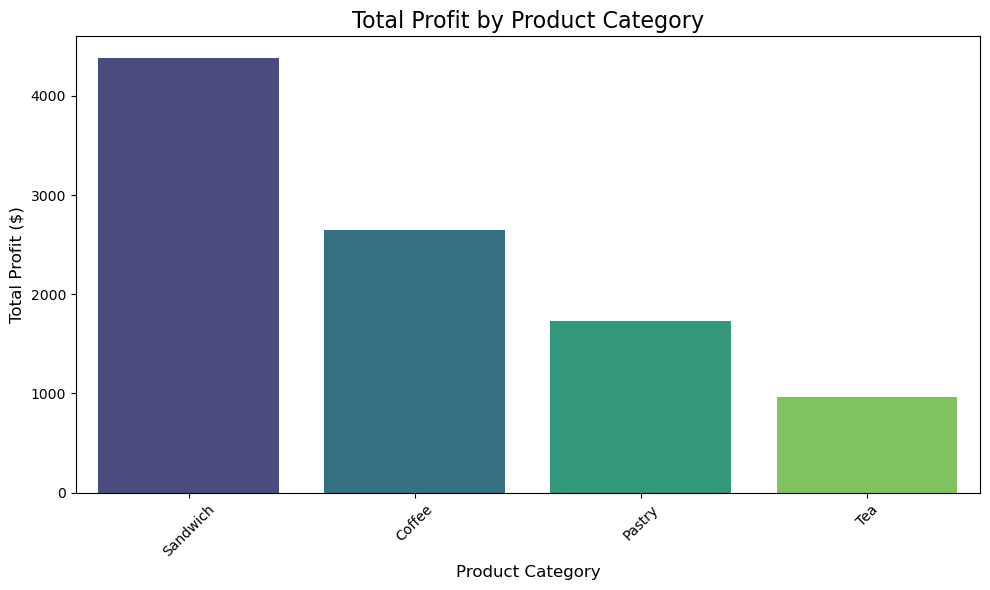

In [24]:
# Task 6: use sns.barplot() with aggregated data

import seaborn as sns
import matplotlib.pyplot as plt

# Plot
plot = category_profit.reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=plot, x='category', y='total_profit', palette='viridis')

plt.title("Total Profit by Product Category", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Profit ($)", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

1. If the merge is not verifird, then missing vslues are introduced in the calculation that mislead in the calculations which results in wrong profit.
2. Aggregating only by category shows which product types are most and least profitable overall, giving a high-level view of performance. Adding location provides a deeper breakdown, revealing where each category performs well or poorly and uncovering store-specific patterns hidden in the broader summary.
3. The analysis revealed which product categories generate the most profit (sandwiches are more profitable) and how performance varies across different store locations (downtown derives most profit). It also highlighted differences in customer purchasing patterns and showed which combinations of category and location drive the strongest sales outcomes.
4. You should focus on expanding and promoting the highest-profit category, which generated the largest total profit in your results (e.g., Coffee: $X total profit vs. Pastry: $Y). This category also showed strong performance across multiple locations, indicating reliable customer demand. Additional analysis—such as time-of-day profit patterns or identifying the most profitable individual products—could help refine pricing and inventory decisions.

## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

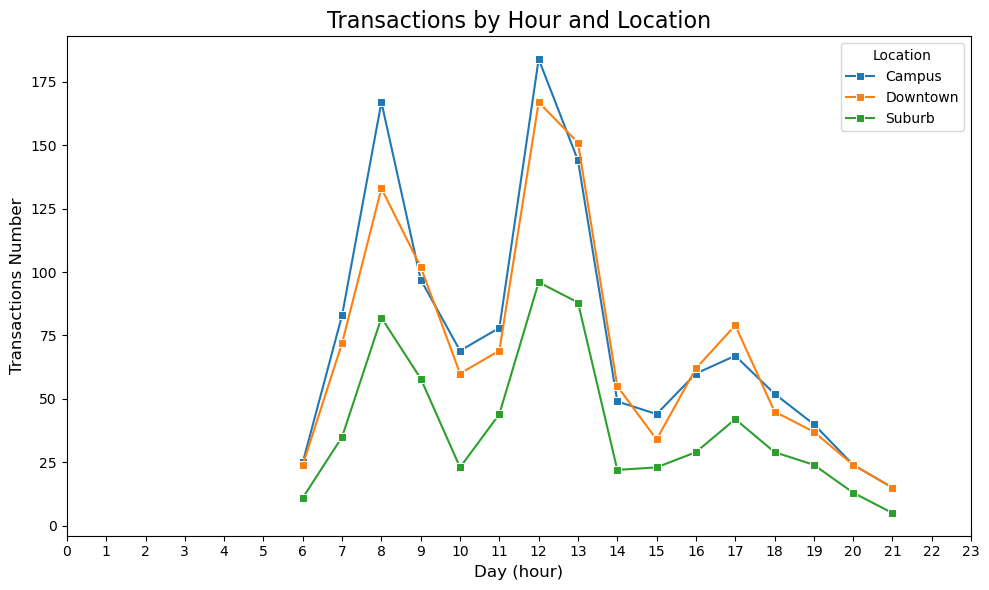

In [29]:
# Bonus: Your time-based analysis here

# Extracting hour from timestamp
merged_clean['hour'] = merged_clean['timestamp'].dt.hour

# Count number of transactions by hour and location
hourly_transactions = ( merged_clean
        .groupby(['location', 'hour'])
        .agg({'transaction_id': 'count'})
        .rename( columns = {'transaction_id' : 'transaction_count'})
        .reset_index()
)


plt.figure(figsize=(10,6))
sns.lineplot(
    data=hourly_transactions,
    x='hour',
    y='transaction_count',
    hue='location',
    marker='s'
)

plt.title("Transactions by Hour and Location", fontsize=16)
plt.xlabel("Day (hour)", fontsize=12)
plt.ylabel("Transactions Number", fontsize=12)
plt.xticks(range(0,24))
plt.legend(title="Location")
plt.tight_layout()
plt.show()

### Your Findings

*Bonus findings here (state your question and what you discovered)*

Question: How do transaction patterns vary by hour across the three store locations?

Answer: The Campus location shows the strongest morning and midday peaks, especially around 9 AM and 1 PM, while Downtown also has significant midday activity but a smaller morning spike. Suburb traffic is consistently lower and has only a modest peak around late morning, indicating lower overall demand compared to the other two locations.

## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.